In [1]:
# scvelo virtual environment

import scvelo as scv
import scanpy as sc
import os
import datetime
import random
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adata_split1 = ad.read_h5ad("/home/users/kzlin/kzlinlab/projects/veloUncertainty/out/kevin/Writeup9/Writeup9_scvelo_larry-subset-2block_split1.h5ad")
adata_split1

AnnData object with n_obs × n_vars = 9862 × 551
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'n_genes_by_counts', 'total_counts', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'gene_cluster', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'log1p', 'neighbors', 'pca', 'recover_dynamics', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'fit_t',

In [3]:
adata_split2 = ad.read_h5ad("/home/users/kzlin/kzlinlab/projects/veloUncertainty/out/kevin/Writeup9/Writeup9_scvelo_larry-subset-2block_split2.h5ad")
adata_split2

AnnData object with n_obs × n_vars = 9862 × 534
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'n_genes_by_counts', 'total_counts', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'gene_cluster', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'log1p', 'neighbors', 'pca', 'recover_dynamics', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'fit_t',

In [4]:
adata = ad.read_h5ad("/home/users/kzlin/kzlinlab/projects/veloUncertainty/out/kevin/Writeup9/Writeup9_scvelo_larry-subset-2block.h5ad")
adata

AnnData object with n_obs × n_vars = 9862 × 795
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'n_genes_by_counts', 'total_counts', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'gene_cluster', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'data_des', 'hvg', 'log1p', 'neighbors', 'pca', 'recover_dynamics', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_clone', 'X_emb', 'X_pca', 'X_umap'
    varm: 'PCs', 

In [5]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40) # used to be n_neighbors=10
sc.tl.umap(adata)
scv.tl.velocity_graph(adata)

computing neighbors
    finished (0:00:45) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocity graph (using 1/20 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:15) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


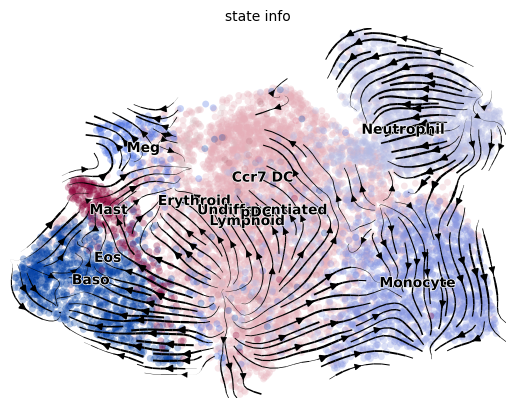

In [6]:
celltype_label = 'state_info'
scv.pl.velocity_embedding_stream(adata, 
                                 basis='umap',
                                 color=celltype_label,
                                 recompute=True)

In [7]:
scv.tl.latent_time(adata)

computing terminal states
    identified 6 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:02) --> added 
    'latent_time', shared time (adata.obs)


In [8]:
import sys
sys.path.append('/home/users/kzlin/kzlinlab/projects/veloUncertainty/git/veloUncertainty/veloUncertainty')
from v2_functions import *

In [9]:
method = 'scv'
text_x=None
text_y=None
cos_sim, Ngenes = compute_cosine_similarity(
    adata_split1,
    adata_split2,
    method
)
cos_sim

Number of overlapped genes for velocity computation in splits = 292


array([0.46726914, 0.57673316, 0.35490553, ..., 0.41902808, 0.59246983,
       0.4661003 ])

Text(0.5, 1.0, 'Histogram of cosine similarity, Ngenes=292')

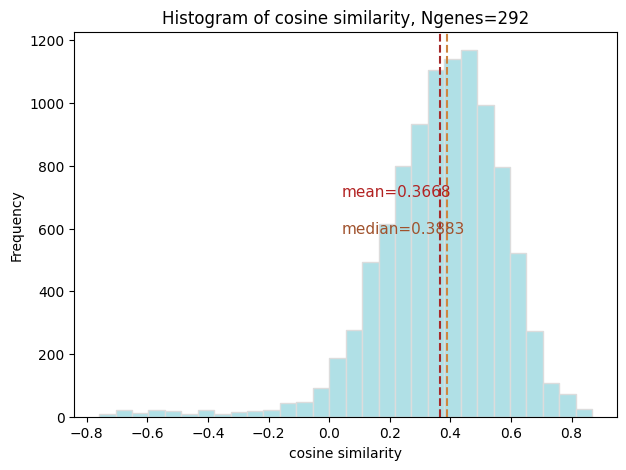

In [10]:
plt.figure(figsize=(7, 5))
counts, bins, patches = plt.hist(cos_sim, bins=30, edgecolor='gainsboro',color='powderblue') 
max_frequency = np.max(counts)
if text_x is None: text_x = np.quantile(cos_sim,[.05])[0]
if text_y is None: text_y = max_frequency/5
plt.axvline(np.mean(cos_sim), color='brown', linestyle='dashed', linewidth=1.5) ## add mean
plt.axvline(np.median(cos_sim), color='peru', linestyle='dashed', linewidth=1.5) ## add median
plt.text(text_x,text_y*3,'mean='+str(np.round(np.mean(cos_sim),4)), color='firebrick', fontsize=11)
plt.text(text_x,text_y*2.5,'median='+str(np.round(np.median(cos_sim),4)), color='sienna', fontsize=11)
plt.xlabel('cosine similarity')
plt.ylabel('Frequency')
plt.title('Histogram of cosine similarity, Ngenes='+str(Ngenes))

In [11]:
adata.obs['cos_sim'] = cos_sim
cos_sim = adata.obs['cos_sim']
latent_time = adata.obs['latent_time']
state_info = adata.obs['state_info']
state_colors = adata.uns['state_info_colors']

state_color_mapping = {state: state_colors[i] for i, state in enumerate(adata.obs['state_info'].unique())}
colors = adata.obs['state_info'].map(state_color_mapping)

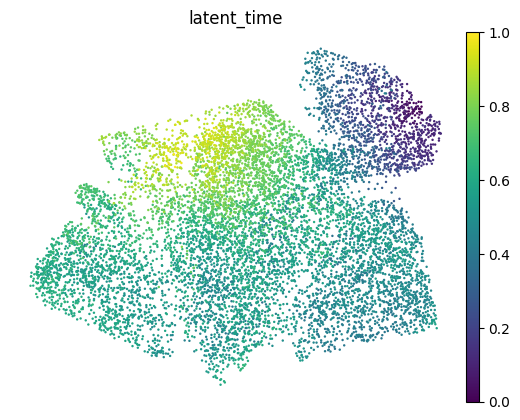

In [12]:
sc.pl.umap(
    adata,
    color="latent_time",
    legend_loc="on data",
    frameon=False,
    legend_fontsize=10,
    legend_fontoutline=2,
)

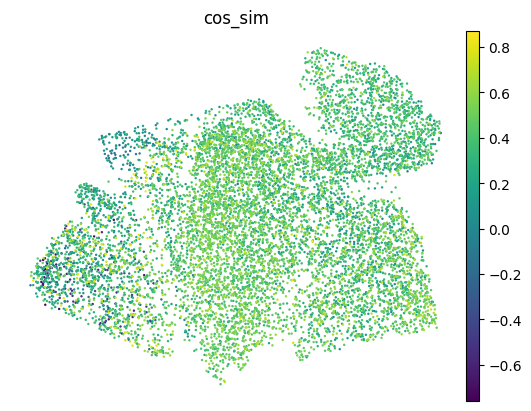

In [13]:
sc.pl.umap(
    adata,
    color="cos_sim",
    legend_loc="on data",
    frameon=False,
    legend_fontsize=10,
    legend_fontoutline=2,
)

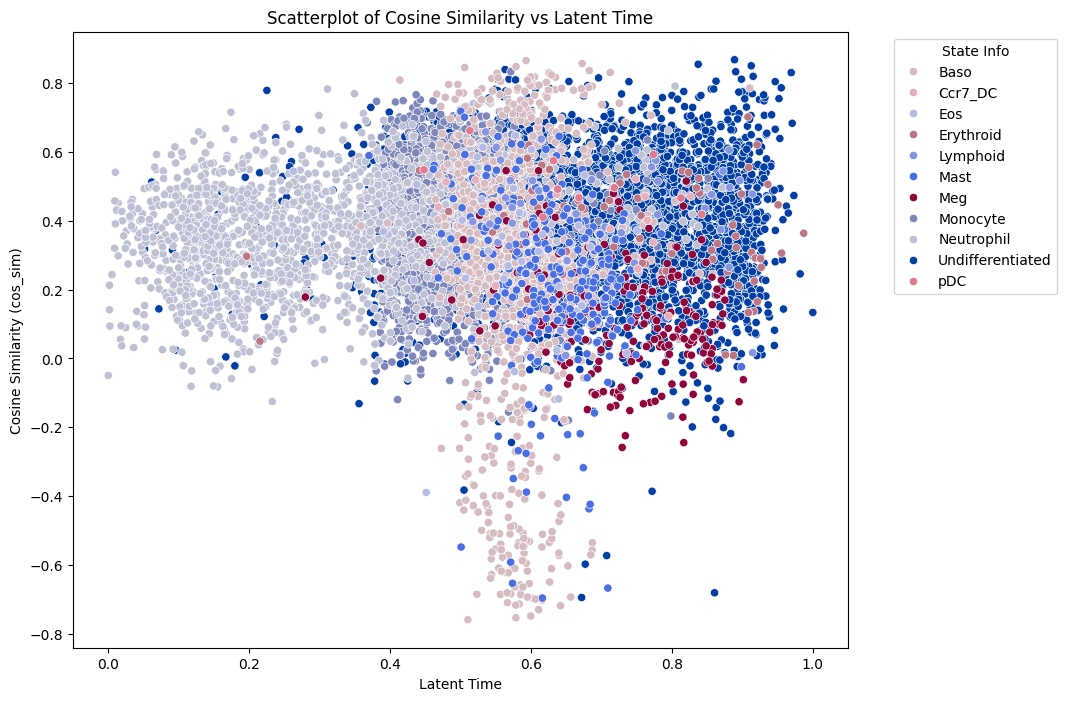

In [14]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=latent_time, y=cos_sim, hue=state_info, palette=state_color_mapping)
plt.ylabel('Cosine Similarity (cos_sim)')
plt.xlabel('Latent Time')
plt.title('Scatterplot of Cosine Similarity vs Latent Time')
plt.legend(title='State Info', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
